## The following codes show the performance of the test and train data using GBM model

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Read the data
excel_file = "/Users/mehmetsiddik/Desktop/CsPbCI3_modified.xlsx"
#excel_file = "/Users/mehmetsiddik/Desktop/Musa/CsPbCl3_QDs.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

# Target variables
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fill missing values with the mean of the respective columns
    X_train_filled = X_train.fillna(X_train.mean())
    X_test_filled = X_test.fillna(X_train.mean())
    y_train_filled = y_train.fillna(y_train.mean())

    # Gradient Boosting Machine
    param_grid = {
        'max_features': ['sqrt', 'log2'],  # More appropriate for decision tree-based methods
        'n_estimators': [100, 150, 200],  # Refined range
        'learning_rate': [0.05, 0.1, 0.15]  # Refined range
    }
    gbm = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(gbm, param_grid, cv=RepeatedKFold(n_splits=5, n_repeats=3), verbose=1, scoring='r2')
    grid_search.fit(X_train_filled, y_train_filled)

    # Performance for train data
    predictions_train = grid_search.predict(X_train_filled)
    print("Performance for train data")
    print("R2:", r2_score(y_train_filled, predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train_filled, predictions_train)))
    print("MAE:", mean_absolute_error(y_train_filled, predictions_train))

    # Performance for test data
    predictions_test = grid_search.predict(X_test_filled)
    print("Performance for test data")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")


Evaluating target: size_nm
Fitting 15 folds for each of 18 candidates, totalling 270 fits
Performance for train data
R2: 0.993315225833087
RMSE: 0.08478204777447795
MAE: 0.07787129709242595
Performance for test data
R2: 0.5096483882077376
RMSE: 0.5490133805296811
MAE: 0.3523206992464647


Evaluating target: S_abs_nm_Y1
Fitting 15 folds for each of 18 candidates, totalling 270 fits
Performance for train data
R2: 0.9990526375882355
RMSE: 0.03157954221764763
MAE: 0.02780342924157521
Performance for test data
R2: 0.6444499133812627
RMSE: 0.5306267330891616
MAE: 0.2655227399324114


Evaluating target: PL
Fitting 15 folds for each of 18 candidates, totalling 270 fits
Performance for train data
R2: 0.9907423968423666
RMSE: 0.09555657159706586
MAE: 0.07990987894061699
Performance for test data
R2: 0.7402082025786871
RMSE: 0.511391103720902
MAE: 0.33418347468144727




## Plots for the Sample and Observed 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder

# Read the data
excel_file = "/Users/mehmetsiddik/Desktop/Musa/CsPbCl3_QDs.xlsx"
#excel_file = "/Users/mehmetsiddik/Desktop/Musa/modified_data.xlsx"
CsPbCl3 = pd.read_excel(excel_file)

# Identify categorical columns
categorical_columns = CsPbCl3.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(CsPbCl3[categorical_columns])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names(categorical_columns))

# Replace categorical columns with one-hot encoded columns
CsPbCl3_encoded = CsPbCl3.drop(categorical_columns, axis=1)
CsPbCl3_encoded = pd.concat([CsPbCl3_encoded, one_hot_encoded_df], axis=1)

# Target variables
targets = ['size_nm', 'S_abs_nm_Y1', 'PL']

# Dictionary to store predictions
predictions = {}

for target in targets:
    print(f"Evaluating target: {target}")
    X = CsPbCl3_encoded.drop(target, axis=1)
    y = CsPbCl3_encoded[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Fill missing values with the mean of the respective columns
    X_train_filled = X_train.fillna(X_train.mean())
    X_test_filled = X_test.fillna(X_train.mean())
    y_train_filled = y_train.fillna(y_train.mean())

    # Gradient Boosting Machine
    param_grid = {
        'max_features': ['sqrt', 'log2'],  # More appropriate for decision tree-based methods
        'n_estimators': [100, 150, 200],  # Refined range
        'learning_rate': [0.05, 0.1, 0.15]  # Refined range
    }
    gbm = GradientBoostingRegressor(random_state=42)
    grid_search = GridSearchCV(gbm, param_grid, cv=RepeatedKFold(n_splits=5, n_repeats=3), verbose=1, scoring='r2')
    grid_search.fit(X_train_filled, y_train_filled)

    # Performance for train data
    predictions_train = grid_search.predict(X_train_filled)
    print("Performance for train data")
    print("R2:", r2_score(y_train_filled, predictions_train))
    print("RMSE:", np.sqrt(mean_squared_error(y_train_filled, predictions_train)))
    print("MAE:", mean_absolute_error(y_train_filled, predictions_train))

    # Performance for test data
    predictions_test = grid_search.predict(X_test_filled)
    print("Performance for test data")
    print("R2:", r2_score(y_test, predictions_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, predictions_test)))
    print("MAE:", mean_absolute_error(y_test, predictions_test))
    print("\n")

    # Store predictions and actual values
    predictions[target] = {
        'y_test': y_test,
        'predictions_test': predictions_test
    }

    

Evaluating target: size_nm
Fitting 15 folds for each of 18 candidates, totalling 270 fits
Performance for train data
R2: 0.9918570024221077
RMSE: 0.14293912578923496
MAE: 0.1281491812784433
Performance for test data
R2: -0.02170553728641811
RMSE: 2.093610568045223
MAE: 1.1726545049494823


Evaluating target: S_abs_nm_Y1
Fitting 15 folds for each of 18 candidates, totalling 270 fits
Performance for train data
R2: 0.9962289872373362
RMSE: 0.43017856872658355
MAE: 0.3602203298347669
Performance for test data
R2: 0.6765971506127044
RMSE: 3.3744246531397795
MAE: 2.1801234553734488


Evaluating target: PL
Fitting 15 folds for each of 18 candidates, totalling 270 fits
Performance for train data
R2: 0.9982684762486176
RMSE: 0.19608240159011767
MAE: 0.1591736885741568
Performance for test data
R2: 0.17500885681109501
RMSE: 3.1291734220256977
MAE: 1.7510645873014103




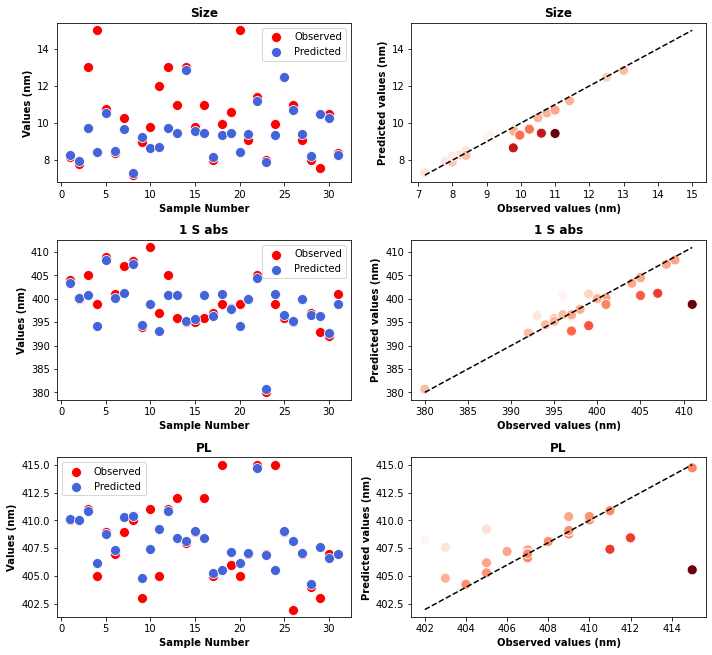

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming predictions dictionary is already populated as before

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(10, 10))  # Adjust the figure size as needed

# Define the titles for the plots
titles = ['Size', '1 S abs', 'PL']

# Loop through the rows and create the plots for sample numbers and observed vs predicted
for i, target in enumerate(targets):
    y_test = predictions[target]['y_test']
    predictions_test = predictions[target]['predictions_test']
    
    # Plot (a): Sample Number vs Predicted Values
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=y_test.values, ax=axs[i, 0], label='Observed', color='red', s=100)
    sns.scatterplot(x=np.arange(1, len(y_test) + 1), y=predictions_test, ax=axs[i, 0], label='Predicted', color='#4363d8', s=100)
    axs[i, 0].set(xlabel='Sample Number', ylabel='Values (nm)', title=f'{titles[i]}')
    axs[i, 0].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 0].set_xlabel('Sample Number', fontweight='bold', fontsize=10)
    axs[i, 0].set_ylabel('Values (nm)', fontweight='bold', fontsize=10)
    axs[i, 0].legend()

    # Plot (b): Observed vs Predicted Values
    residuals = y_test.values - predictions_test
    
    if i == 0:  # Only handle outliers for the size_nm plot
        # Identify the indices of the outliers
        outlier_indices = np.abs(residuals) > 2  # You can adjust the threshold as needed
        # Remove the outliers from the scatterplot
        sns.scatterplot(x=y_test.values[~outlier_indices], y=predictions_test[~outlier_indices], hue=residuals[~outlier_indices], ax=axs[i, 1], palette='Reds', s=100)
    else:
        sns.scatterplot(x=y_test.values, y=predictions_test, hue=residuals, ax=axs[i, 1], palette='Reds', s=100)
    
    axs[i, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    axs[i, 1].set(xlabel='Observed values (nm)', ylabel='Predicted values (nm)', title=f'{titles[i]}')
    axs[i, 1].set_title(f'{titles[i]}', fontweight='bold', fontsize=12)
    axs[i, 1].set_xlabel('Observed values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].set_ylabel('Predicted values (nm)', fontweight='bold', fontsize=10)
    axs[i, 1].get_legend().remove()

fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()
